<a href="https://colab.research.google.com/github/leabizbille/ProjetIOT/blob/main/Marc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install summarytools -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.5 MB/s eta 0:00:00


In [2]:
!pip install pygwalker -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 47.1 MB/s eta 0:00:00


In [3]:
pip install sweetviz -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 40.0 MB/s eta 0:00:00


In [4]:
import pygwalker as pyg  # Crée des visualisations interactives basées sur pandas DataFrame, inspiré de Tableau.
from summarytools import dfSummary  # Génère des résumés descriptifs détaillés pour un DataFrame.
import pandas as pd  # Manipulation et analyse de données tabulaires, comme les CSV.
import matplotlib.pyplot as plt  # Création de graphiques statiques et personnalisables.
import seaborn as sns  # Extension de Matplotlib pour des graphiques plus élégants et statistiques.
import sweetviz as sv  # Génère des rapports HTML interactifs pour explorer les données.
import missingno as msno  # Visualisation des données manquantes (heatmaps, matrices, etc.).
from google.colab import files  # Permet de télécharger ou téléverser des fichiers depuis/vers Colab.

import numpy as np  # Manipulation de données numériques (tableaux, statistiques simples, etc.).
from scipy import stats  # Fonctions statistiques avancées (tests, distributions, etc.).
import statsmodels.api as sm  # Analyse statistique avancée et modélisation (régressions, ANOVA, etc.).
from statsmodels.formula.api import ols  # Régression linéaire avec formules (similaire à R).
import plotly.graph_objects as go  # Création de visualisations interactives avancées avec Plotly.
import plotly.express as px
from datetime import datetime, time


In [5]:
from google.colab import files
uploaded = files.upload()  # Vous serez invité à sélectionner votre fichier


Saving Marc_SmartOme.csv to Marc_SmartOme.csv


In [961]:
# Charger le fichier CSV en conservant les titres des colonnes
Marc= pd.read_csv("/content/Marc_SmartOme.csv",sep= ";")


<Axes: >

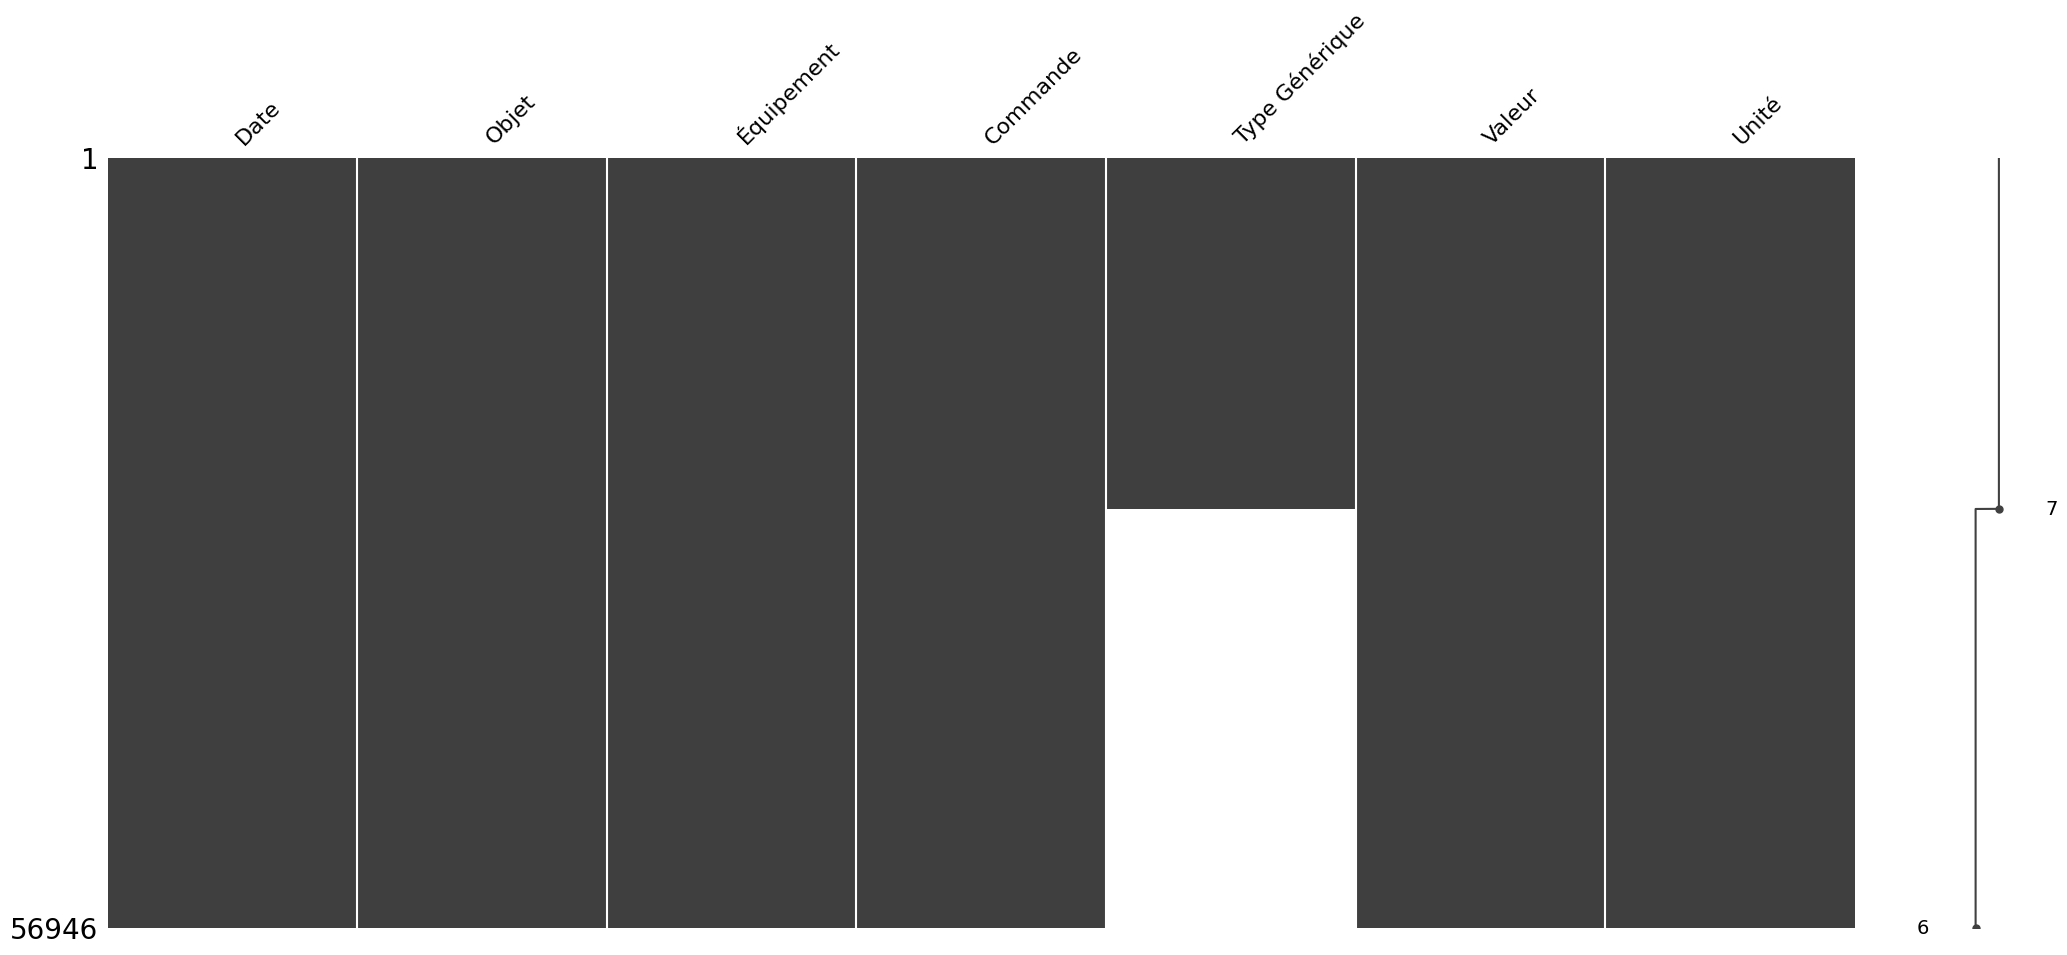

In [962]:
msno.matrix(Marc)

In [963]:
# Description pour comprendre les données et mettre en suite le tableau en forme
dfSummary(Marc)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date[object],1. 2024-04-30 02:00:002. 2024-02-24 06:00:003. 2024-04-18 02:00:004. 2024-04-10 02:00:005. 2024-05-21 02:00:006. 2024-03-05 10:00:007. 2024-03-21 06:00:008. 2024-04-19 02:00:009. 2024-04-26 02:00:0010. 2024-05-17 02:00:0011. other,"11 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)56,845 (99.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Objet[object],1. TECHNIQUE2. OPENSPACE3. BUREAU 1 (MARC)4. CUISINE5. BUREAU 2 (ARCHIVES),"30,991 (54.4%)8,620 (15.1%)8,302 (14.6%)6,867 (12.1%)2,166 (3.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACM0lEQVR4nO3bQWrbUBiF0V/FhGYiYQxejBfRxXYR2o0x1qAJmaiDQghu7Eyerlz3nBU8zIeMxLvdPM8FCd/WPgD/D7ERIzZiuqp6rqqntQ/yQN7meX5Z+xD3aLPb7X70fb9d+yCPYpqmU9d1PwX3t03f99vD4fAyDMPr2of5153P5+/jOG6Px+NTVYntwqaqahiG1/1+/2vtwzyI57UPcK+8IBAjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMZuqP1dj1j7II/A73raZpuk0juO2XI1pYpqmU1W9rX2Oe+RaeHuuhV/R2Y2S4gWBmKX/Rv2l8G7RdZWlER8ttq6yNOLS0usqn1N45wWBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IhZbF1lacSlRddVlkZ85Fo4MdZVxHhBIMbfKDHWVcRYVxFjXUWMFwRixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI8a6ihjrKmJcCyfGuoqY1k82TzKuajp4MXDhlmaDFwMXvtJ68GLgwlU+6hIjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjptm6ypqKrzRdV1lTcYsNAjHWVcTcerJ5StHU1XWVpRStfbquspRiCbfWVZZSNOWjLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZiPl1XWUqxhKvrKkspWrNBIMa6ihgvCMSIjZjfxzEON3LH9zwAAAAASUVORK5CYII="">",0(0.0%)
3,Équipement[object],1. TIC 1 (Suivi Conso Elec)2. Thermostat Open Space Z23. Thermostat Marc Z34. Thermostat Cuisine Z65. AIRZONE (Suivi Conso Elec)6. PAC (Suivi Conso Elec)7. Thermostat Archive Z58. APPOINT ELECTRIQUE (Suivi Cons,"18,514 (32.5%)8,620 (15.1%)8,302 (14.6%)6,867 (12.1%)6,807 (12.0%)5,302 (9.3%)2,166 (3.8%)368 (0.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADJklEQVR4nO3dXWoTUQCG4RMJojcJIdDFdBEu1kVkN6U0FyrexAt/EGkiTWbesfg8KzgXL6edYb52dTqdBhTeLH0A/h9iIyM2MmIjIzYyYiOzGmO8H2O8XfogE/h6Op0+L30Izlvv9/sPm81mt/RBbnU8Hh9Xq9VHwf271pvNZnd/f/95u91+Wfow13p6enp3OBx2Dw8Pb8cYYvtHrccYY7vdfrm7u/u09GFu9H7pA3CZBwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy6zG+f6Kz9EFu8drP/79YH4/Hx8PhsBuv/BOd4/H4OMb4uvQ5OM9n4WRW/vwClblvNrcNv8w6eDFC4XezDV6MUPjT3IOXV/2Ey7S81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMz2+DFCIU/zTp4MULhdz4LJ2PwQsYDAhk/RslYV5GxriJjXUXGAwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVkfBZOxrqKzNQ3m5uMsyYdvBi4cMlkgx

- Valeurs contiennent différents type.
- 54 % de donnée manquante dans "Type Générique". Chercher l'utilisation et analyse l'interet.

Pour toutes les colonnes, reformater les données.
Un pivotement ou une transposition du tableau sera probablement nécessaire.

Mélange des modalites entre pièces et type d équipement

In [964]:
# Séparer la colonne 'datetime' en deux colonnes distinctes
Marc[['date', 'time']] = Marc['Date'].str.split(' ', expand=True)

# Convertir les nouvelles colonnes au format datetime
Marc['date'] = pd.to_datetime(Marc['date'], format='%Y-%m-%d')
Marc['time'] = pd.to_datetime(Marc['time'], format='%H:%M:%S').dt.time


In [965]:
# Ajouter une colonne 'Mois' pour extraire le mois (1-12)
Marc['Mois'] = Marc['date'].dt.month

In [966]:
# Ajouter une colonne 'Semaine' pour extraire la semaine de l'année
Marc['Semaine'] = Marc['date'].dt.isocalendar().week

In [967]:
# Créer une colonne 'Année' si elle n'existe pas déjà
Marc['annee'] = Marc['date'].dt.year

In [968]:
# Vérifier et convertir si nécessaire
if isinstance(Marc['time'].iloc[0], time):  # Si déjà au format datetime.time
    Marc['time'] = pd.to_datetime(Marc['time'], format='%H:%M:%S').dt.time
elif Marc['time'].dtype == 'object':  # Si la colonne est au format chaîne
    Marc['time'] = pd.to_datetime(Marc['time'], format='%H:%M:%S').dt.time
else:
    raise ValueError("Le format de la colonne 'time' n'est pas compatible.")


In [969]:
# Conversion des heures en objets datetime.time
nuit_start = datetime.strptime('20:00:00', '%H:%M:%S').time()
nuit_end = datetime.strptime('08:00:00', '%H:%M:%S').time()

# Mise à jour de la colonne 'Jour/Nuit'
Marc['Jour/Nuit'] = np.where(
    (Marc['time'] > nuit_start) | (Marc['time'] < nuit_end),
    'Nuit',
    'Jour'
)

In [970]:
# Ajouter une colonne 'Ete/Hiver' basée sur le mois (valeurs numériques)
Marc['Ete/Hiver'] = np.where(
    (Marc['Mois'] >= 5) & (Marc['Mois'] <= 9),  # Mois de mai (5) à septembre (9) inclus
    'Ete',  # Été
    'Hiver'  # Hiver
)

In [971]:
# Vérifier si la colonne existe, puis la supprimer si elle est présente
if 'Type Générique' in Marc.columns:
    Marc = Marc.drop(columns=['Type Générique'])

In [972]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = Marc['Objet'].unique()

# Afficher les modalités
print(modalites)

['BUREAU 1 (MARC)' 'BUREAU 2 (ARCHIVES)' 'CUISINE' 'OPENSPACE' 'TECHNIQUE']


In [973]:
# Fonction de nettoyage
def nettoyer_Objet(data):
    if data == 'BUREAU 1 (MARC)': # Changement de nom
        return 'Bureau'
    elif data == 'BUREAU 2 (ARCHIVES)': # Changement de nom
        return 'Bureau'
    elif data == 'CUISINE':  # Clarifie
        return 'Cuisine'
    elif data == 'OPENSPACE':  # Clarifie
        return 'Open_Space'
    elif data == 'TECHNIQUE': # Changement de nom
        return 'Technique'
    else:
        return data  # Conserve les autres modalités intactes
# Appliquer la fonction de nettoyage à la colonne 'Objets'
Marc['Piece'] = Marc['Objet'].apply(nettoyer_Objet)

In [974]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = Marc['Équipement'].unique()

# Afficher les modalités
print(modalites)

['Thermostat Marc Z3' 'Thermostat Archive Z5' 'Thermostat Cuisine Z6'
 'Thermostat Open Space Z2' 'AIRZONE (Suivi Conso Elec)'
 'APPOINT ELECTRIQUE (Suivi Conso)' 'PAC (Suivi Conso Elec)'
 'TIC 1 (Suivi Conso Elec)']


In [975]:
# Fonction de nettoyage
def nettoyer_type(data):
    if data == 'Thermostat Marc Z3': # Changement de nom
        return 'Thermostats'
    elif data == 'Thermostat Archive Z5': #
        return 'Thermostats'
    elif data == 'Thermostat Cuisine Z6':  #
        return 'Thermostats'
    elif data == 'Thermostat Open Space Z2':  #
        return 'Thermostats'
    elif data == 'AIRZONE (Suivi Conso Elec)': #
        return 'AirZone'
    elif data == 'APPOINT ELECTRIQUE (Suivi Conso)':  #
        return 'Appoint-Electrique'
    elif data == 'PAC (Suivi Conso Elec)':  #
        return 'Compteurs'
    elif data == 'TIC 1 (Suivi Conso Elec)':  #
        return 'Compteurs'
    else:
        return data  # Conserve les autres modalités intactes
# Appliquer la fonction de nettoyage à la colonne 'Objets'
Marc['Objet'] = Marc['Équipement'].apply(nettoyer_type)

In [976]:
# Fonction de nettoyage
def nettoyer(data):
    if data == 'Thermostat Marc Z3': # Changement de nom
        return 'Z3'
    elif data == 'Thermostat Archive Z5': # Changement de nom
        return 'Z5'
    elif data == 'Thermostat Cuisine Z6':  # Clarifie
        return 'Z6'
    elif data == 'Thermostat Open Space Z2':  # Clarifie
        return 'Z2'
    elif data == 'AIRZONE (Suivi Conso Elec)': # Changement de nom
        return 'AirZone'
    elif data == 'APPOINT ELECTRIQUE (Suivi Conso)':  # Clarifie
        return 'Appoint-Electrique'
    elif data == 'PAC (Suivi Conso Elec)':  # Clarifie
        return 'PAC'
    elif data == 'TIC 1 (Suivi Conso Elec)':  # Clarifie
        return 'TIC'
    else:
        return data  # Conserve les autres modalités intactes
# Appliquer la fonction de nettoyage à la colonne 'Objets'
Marc['Réplicat'] = Marc['Équipement'].apply(nettoyer)

In [977]:
# Fonction de nettoyage
def nettoyer_Equipement(data):
    if data.startswith('Thermostat'):
        return 'Thermostat'
    else :
        return 'Conso_Objet'
    return data

# Appliquer la fonction de nettoyage à la colonne 'Objets'
Marc['Équipement'] = Marc['Équipement'].apply(nettoyer_Equipement)

In [978]:
# Description pour comprendre les données et mettre en suite le tableau en forme
#dfSummary(Marc)

In [979]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = Marc['Commande'].unique()

# Afficher les modalités
print(modalites)

['Température ambiante' 'Consommation jour' 'Consommation mois']


In [980]:
def nettoyer_Commande(data):
    data = data.strip()  # Supprime les espaces au début et à la fin
    if data.startswith('Température ambiante'):
        return 'Température'
    elif data == 'Consommation jour':  # Nettoie "Conso "
        return 'Conso_jour'
    elif data == 'Consommation mois':
        return 'Conso_mois'
    else:
        return data  # Conserve les autres modalités intactes

# Appliquer la fonction de nettoyage à la colonne Equipement
Marc['Commande'] = Marc['Commande'].apply(nettoyer_Commande)

In [981]:
Marc['Valeur'] = pd.to_numeric(Marc['Valeur'].str.replace(',', '.'), errors='coerce')

In [982]:
print(Marc.isna().sum())

Date          0
Objet         0
Équipement    0
Commande      0
Valeur        0
Unité         0
date          0
time          0
Mois          0
Semaine       0
annee         0
Jour/Nuit     0
Ete/Hiver     0
Piece         0
Réplicat      0
dtype: int64


Rapport des données nettoyées :

In [983]:
#my_report = sv.analyze(Marc)

In [984]:
#my_report.show_html()

Rapport des données de Val Roland, binaire entre les appartements les T°C et les conso

In [985]:
#my_report = sv.compare_intra(Marc, Marc["Unité"] == "kWh", ["Consommation", "Température"])

In [986]:
#my_report.show_html()

In [987]:
# Sauvegarder le DataFrame en tant que fichier CSV
#Marc.to_csv('Marc_export.csv', index=False)

# Télécharger le fichier dans votre machine locale
#files.download('Marc_export.csv')

Graphiques, pour analyse visuelle.

In [988]:
# Filtrer les données pour "Unité" en °C
data_celsius = Marc[Marc['Unité'] == '°C']  # Vérifier que 'Unité' est bien une chaîne

In [989]:

# Créer la figure avec toutes les traces initiales
fig = go.Figure()

# Ajouter une trace pour chaque réplicat
replicats = data_celsius['Réplicat'].unique()
for i, replicat in enumerate(replicats):
    data = data_celsius[data_celsius['Réplicat'] == replicat]
    fig.add_trace(go.Scatter(
        x=data['date'],
        y=data['Valeur'],
        mode='lines',
        name=f'Sonde {replicat}',
        visible=True  # Toutes les traces sont visibles par défaut
    ))

# Créer les boutons pour sélectionner une sonde spécifique ou toutes les sondes
buttons = [
    {
        'method': 'update',
        'label': f'Afficher {replicat}',
        'args': [
            {'visible': [i == j for j in range(len(fig.data))]},
            {'title': f'Évolution des températures pour la sonde {replicat}'}
        ]
    }
    for i, replicat in enumerate(replicats)
]

# Ajouter un bouton pour afficher toutes les sondes
buttons.append(
    {
        'method': 'update',
        'label': 'Afficher tout',
        'args': [
            {'visible': [True] * len(fig.data)},
            {'title': 'Évolution des températures par pièce'}
        ]
    }
)

# Ajouter le menu déroulant
fig.update_layout(
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.17,
            'y': 1.15,
            'xanchor': 'left',
            'yanchor': 'top'
        }
    ],
    title='Évolution des températures par pièce',
    xaxis_title='Date',
    yaxis_title='Température (°C)',
    xaxis_tickangle=-45  # Rotation des dates pour lisibilité
)

# Afficher le graphique
fig.show()



Probleme avec la sonde 5 !

In [990]:
#fig.write_html('graphique_interactif.html')


In [991]:
# Filtrer les données pour "Unité" en °C
data_Conso = Marc[Marc['Unité'] == 'kWh']  # Vérifier que 'Unité' est bien une chaîne

In [992]:
# Créer le graphique avec Plotly
fig = px.line(
    data_Conso,
    x='date',
    y='Valeur',
    color='Réplicat',  # Différencier les courbes par réplicat
    title="Évolution des consommation kWh par objet",
    labels={'date': 'Date', 'Valeur': 'Température (°C)'}
)

# Personnaliser les axes et le titre
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Consommation éléctrique (kWh)",
    xaxis_tickangle=-45  # Rotation des dates pour lisibilité
)

# Afficher le graphique
fig.show()



In [993]:
#fig.write_html('graphique_interactif_consoBrut.html')

Interet des données cumulées ? A effacer ?  

In [994]:
# Convertir la colonne 'date' en datetime si ce n'est pas déjà fait
data_Conso['date'] = pd.to_datetime(data_Conso['date'])

# Extraire le mois et l'année pour l'axe des X (format "Mois Année")
data_Conso['Month'] = data_Conso['date'].dt.strftime('%B')  # Format mois complet suivi de l'année (ex. "janvier 2024")

# Créer un histogramme avec Plotly Express
fig = px.histogram(
    data_Conso,
    x='Month',  # Afficher les mois et années sur l'axe des X
    y='Valeur',
    color='Réplicat',  # Couleur par réplicat
    barmode='group',  # Grouper les barres
    facet_row='Commande',  # Créer des sous-graphiques en lignes pour chaque commande
    title='Histogramme des Consommations avec Réplicats',
    labels={'Month': 'Mois', 'Valeur': 'kWh'}
)

# Dissocier les axes y des différentes facettes pour pouvoir les modifier indépendamment
fig.update_yaxes(matches=None)

# Modifier les légendes des axes y pour chaque facette

# Afficher le graphique
fig.show()




<ipython-input-994-29862c6f2d4f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-994-29862c6f2d4f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



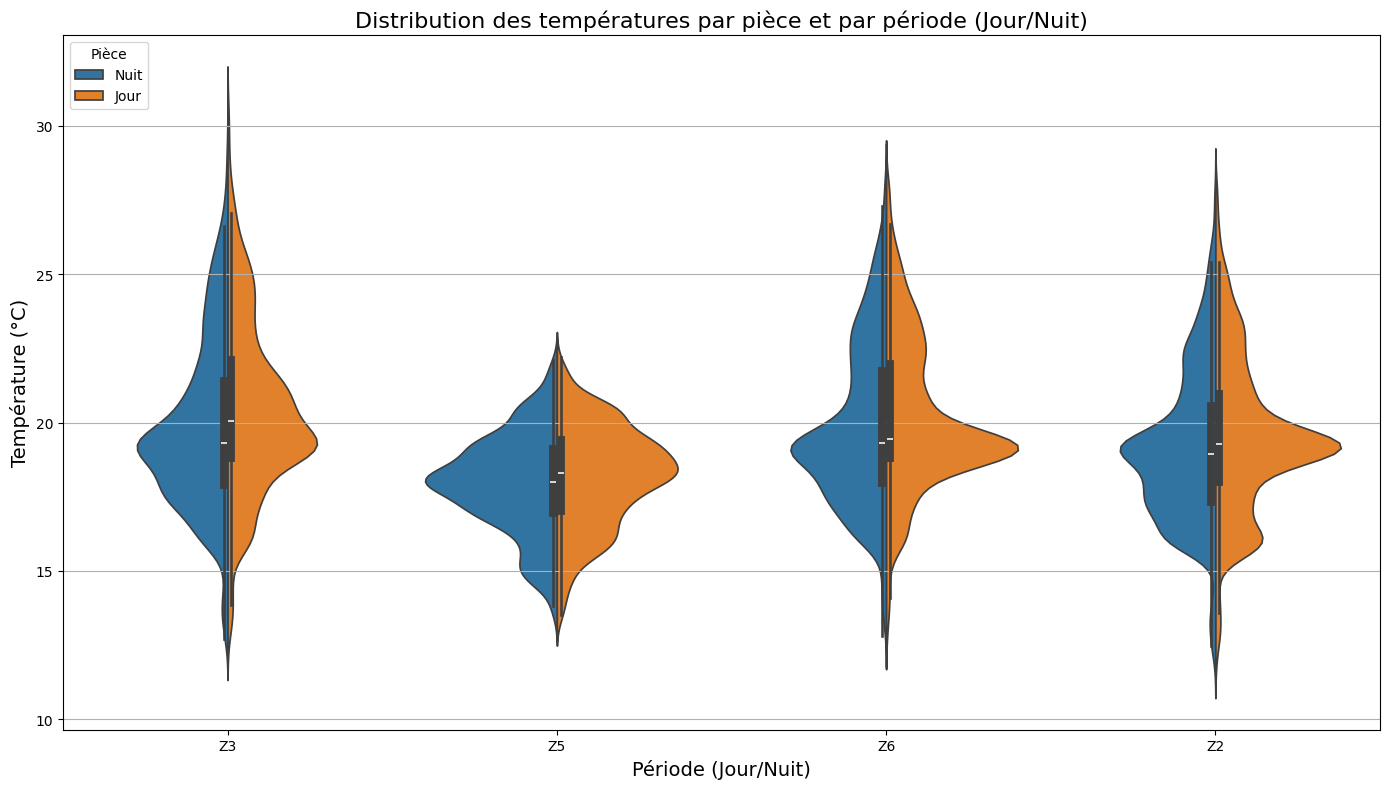

In [995]:

# Initialiser le graphique
plt.figure(figsize=(14, 8))

# Tracer un graphique en violon
sns.violinplot(
    data=data_celsius,
    x='Réplicat',  # Axe catégoriel
    y='Valeur',     # Température
    hue='Jour/Nuit',  # Différencier par réplicat
    split=True,     # Diviser les violons pour chaque réplicat
    palette='tab10'
)

# Ajouter des labels et une légende
plt.title("Distribution des températures par pièce et par période (Jour/Nuit)", fontsize=16)
plt.xlabel("Période (Jour/Nuit)", fontsize=14)
plt.ylabel("Température (°C)", fontsize=14)
plt.legend(title="Pièce", loc='upper left', fontsize=10)
plt.grid(True, axis='y')

# Afficher le graphique
plt.tight_layout()
plt.show()


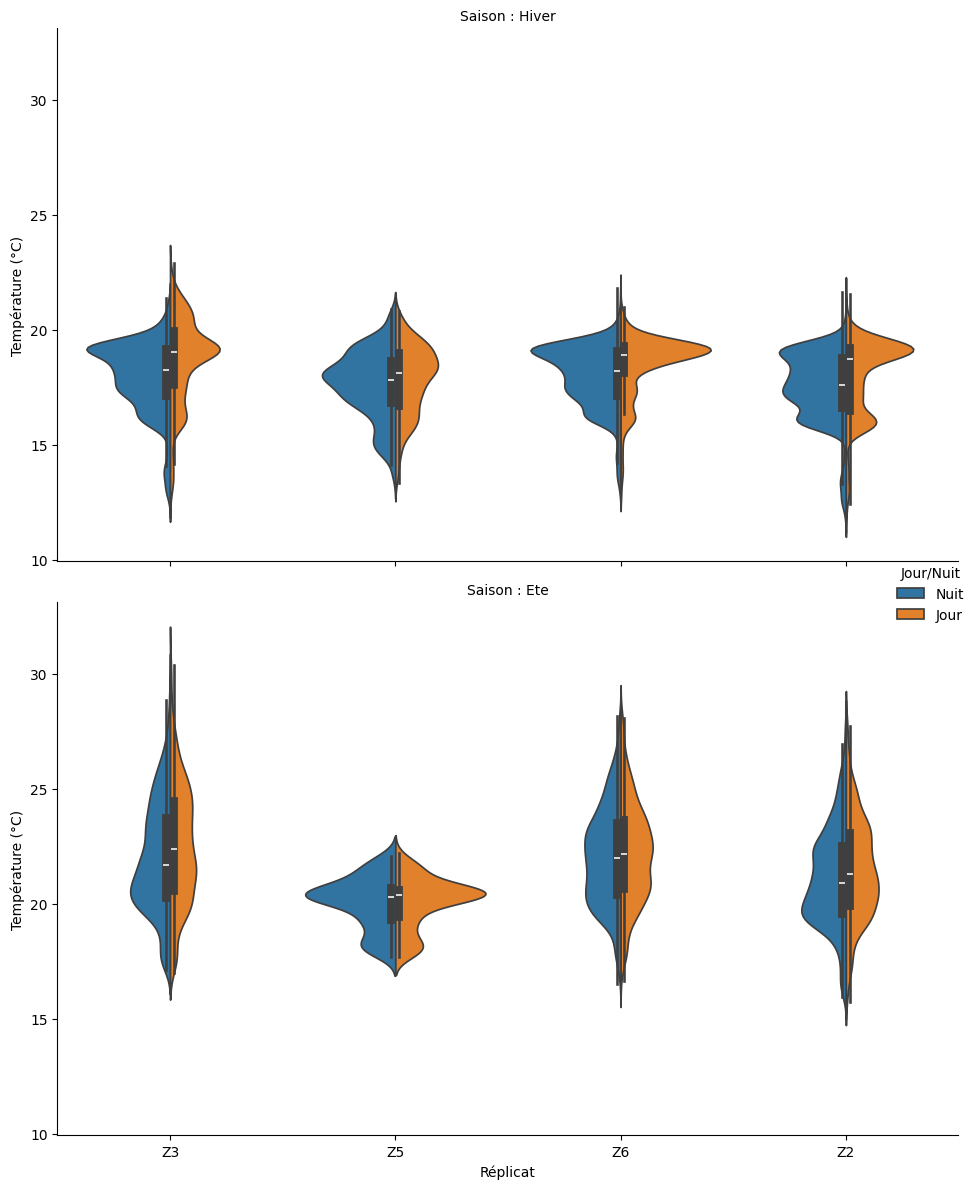

In [996]:
# Initialiser une grille de facettes avec "Été/Hiver"
g = sns.FacetGrid(data_celsius, col="Ete/Hiver", col_wrap=1, height=6, aspect=1.5)

# Ajouter un graphique en violon à chaque facette
g.map_dataframe(
    sns.violinplot,
    x="Réplicat",  # Axe catégoriel
    y="Valeur",    # Température
    hue="Jour/Nuit",  # Différencier les périodes Jour/Nuit
    split=True,    # Diviser les violons pour chaque catégorie
    palette="tab10"
)

# Ajouter des ajustements
g.set_titles("Saison : {col_name}")
g.set_axis_labels("Réplicat", "Température (°C)")
g.add_legend(title="Jour/Nuit")

# Ajuster l'affichage et montrer
plt.tight_layout()
plt.show()


In [997]:
from IPython.display import display
display(Marc)


,Date,Objet,Équipement,Commande,Valeur,Unité,date,time,Mois,Semaine,annee,Jour/Nuit,Ete/Hiver,Piece,Réplicat
0,2024-01-01 00:00:00,Thermostats,Thermostat,Température,17.000000,°C,2024-01-01,00:00:00,1,1,2024,Nuit,Hiver,Bureau,Z3
1,2024-01-01 01:00:00,Thermostats,Thermostat,Température,17.055556,°C,2024-01-01,01:00:00,1,1,2024,Nuit,Hiver,Bureau,Z3
2,2024-01-01 02:00:00,Thermostats,Thermostat,Température,17.100000,°C,2024-01-01,02:00:00,1,1,2024,Nuit,Hiver,Bureau,Z3
3,2024-01-01 03:00:00,Thermostats,Thermostat,Température,17.100000,°C,2024-01-01,03:00:00,1,1,2024,Nuit,Hiver,Bureau,Z3
4,2024-01-01 03:10:00,Thermostats,Thermostat,Température,17.566667,°C,2024-01-01,03:10:00,1,1,2024,Nuit,Hiver,Bureau,Z3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56941,2024-11-24 21:11:09,Compteurs,Conso_Objet,Conso_mois,373.840000,kWh,2024-11-24,21:11:09,11,47,2024,Nuit,Hiver,Technique,TIC
56942,2024-11-24 21:12:09,Compteurs,Conso_Objet,Conso_mois,373.864000,kWh,2024-11-24,21:12:09,11,47,2024,Nuit,Hiver,Technique,TIC
56943,2024-11-24 21:13:09,Compteurs,Conso_Objet,Conso_mois,373.887000,kWh,2024-11-24,21:13:09,11,47,2024,Nuit,Hiver,Technique,TIC
56944,2024-11-24 21:14:09,Compteurs,Conso_Objet,Conso_mois,373.910000,kWh,2024-11-24,21:14:09,11,47,2024,Nuit,Hiver,Technique,TIC


In [998]:
# Créer un nouveau DataFrame en excluant les lignes où "Commande" est égale à "Conso_mois"
Marc_Conso_Day = Marc[Marc['Commande'] != 'Conso_mois']

# Créer une copie explicite du DataFrame pour éviter les avertissements
Marc_Conso_Day = Marc_Conso_Day.copy()



In [999]:
display(Marc_Conso_Day)

,Date,Objet,Équipement,Commande,Valeur,Unité,date,time,Mois,Semaine,annee,Jour/Nuit,Ete/Hiver,Piece,Réplicat
0,2024-01-01 00:00:00,Thermostats,Thermostat,Température,17.000000,°C,2024-01-01,00:00:00,1,1,2024,Nuit,Hiver,Bureau,Z3
1,2024-01-01 01:00:00,Thermostats,Thermostat,Température,17.055556,°C,2024-01-01,01:00:00,1,1,2024,Nuit,Hiver,Bureau,Z3
2,2024-01-01 02:00:00,Thermostats,Thermostat,Température,17.100000,°C,2024-01-01,02:00:00,1,1,2024,Nuit,Hiver,Bureau,Z3
3,2024-01-01 03:00:00,Thermostats,Thermostat,Température,17.100000,°C,2024-01-01,03:00:00,1,1,2024,Nuit,Hiver,Bureau,Z3
4,2024-01-01 03:10:00,Thermostats,Thermostat,Température,17.566667,°C,2024-01-01,03:10:00,1,1,2024,Nuit,Hiver,Bureau,Z3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47685,2024-11-24 21:11:09,Compteurs,Conso_Objet,Conso_jour,6.166000,kWh,2024-11-24,21:11:09,11,47,2024,Nuit,Hiver,Technique,TIC
47686,2024-11-24 21:12:09,Compteurs,Conso_Objet,Conso_jour,6.190000,kWh,2024-11-24,21:12:09,11,47,2024,Nuit,Hiver,Technique,TIC
47687,2024-11-24 21:13:09,Compteurs,Conso_Objet,Conso_jour,6.213000,kWh,2024-11-24,21:13:09,11,47,2024,Nuit,Hiver,Technique,TIC
47688,2024-11-24 21:14:09,Compteurs,Conso_Objet,Conso_jour,6.236000,kWh,2024-11-24,21:14:09,11,47,2024,Nuit,Hiver,Technique,TIC


In [1000]:
# Description pour comprendre les données et mettre en suite le tableau en forme
dfSummary(Marc_Conso_Day)

/usr/local/lib/python3.10/dist-packages/summarytools/summarytools.py:124: RuntimeWarning:

divide by zero encountered in scalar divide



No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date[object],1. 2024-01-27 02:00:002. 2024-01-11 12:00:003. 2024-04-19 02:00:004. 2024-04-30 02:00:005. 2024-04-12 02:00:006. 2024-03-21 06:00:007. 2024-03-25 04:00:008. 2024-02-24 06:00:009. 2024-04-18 02:00:0010. 2024-03-05 10:00:0011. other,"7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)41,687 (99.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Objet[object],1. Thermostats2. Compteurs3. AirZone4. Appoint-Electrique,"25,955 (62.2%)12,077 (28.9%)3,496 (8.4%)229 (0.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB+ElEQVR4nO3bQWqjYBzG4b9FynRjCEIOk0P0sHMIbxNCXLSlG2cxncUsK+S15nueE3yEHxrFt1uWpSDhaesD0A6xEdNV1UtVPW99kIZ9LsvyvvUhEvpxHF+HYThufZBWzfN87brudwvB9cMwHM/n8/vhcPjY+jCtud1uv6ZpOl4ul+eqevzYqqoOh8PH6XR62/owjXrZ+gApHhCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZi+6u+nLlsfpEWt/e79PM/XaZqO1dCnLj/JPM/Xqvrc+hwJPgvfXjOfhXemfKR4QCBmr7fRZm49j2SX66qWFkmPZHfrqtYWSY9kr+sqr2l2yAMCMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmJ2N+Xb01n53y6nfC3N3x6JDQIxpnzErL2yubLwbavWVdZNrPHtdZV1E2utXVft5smVn8NLXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEfHtdZd3EWqvWVdZNrGGDQIx1FTH/rmzlSsW99eM4vlZVWUtxb0/DMBy/pnx7W8WzM96zESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZj+aylVZS3FndkgEGNdRYz/bMT8ASdluNuJRSq0AAAAAElFTkSuQmCC"">",0(0.0%)
3,Équipement[object],1. Thermostat2. Conso_Objet,"25,955 (62.2%)15,802 (37.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABNElEQVR4nO3bQWrDMBRF0a9iQjORMAYvJovoYrsI7cYYa9CETNRB9/Ak+u5ZwU+4GBL8Uu89AIUUEfeIuI0+xNi79/4cfYTCsm3bV855HX2Iq9bamVL6dghuyTmvj8fjWUp5jT7GzXVdn7XW9TiOW0T8/9giIkopr33ff0YfY+o++gCVj9EHwAexQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yS8TfS3yjD3Hk9r0vrbWz1rqG0Ut8M2mtnRHxHn2HAoOX8WwGL4kpH1Tcnmw2T5EZWU35nGZzM7KZ8rnN5mbkNuXjF/dA/KkLGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2RspnwOn3F2VlM+p9ncjBi8QOYXCltq37DnnSoAAAAASUVORK5CYII="">",0(0.0%)
4,Commande[object],1. Température2. Conso_jour,"25,955 (62.2%)15,802 (37.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABNElEQVR4nO3bQWrDMBRF0a9iQjORMAYvJovoYrsI7cYYa9CETNRB9/Ak+u5ZwU+4GBL8Uu89AIUUEfeIuI0+xNi79/4cfYTCsm3bV855HX2Iq9bamVL6dghuyTmvj8fjWUp5jT7GzXVdn7XW9TiOW0T8/9giIkopr33ff0YfY+o++gCVj9EHwAexQYbYIENskCE

In [1001]:
 # Calculer les décomptes des valeurs uniques dans la colonne 'time'
decompte = Marc_Conso_Day['time'].value_counts()
tableau_modalites = decompte.reset_index()# Convertir en DataFrame
tableau_modalites.columns = ['Valeur Unique', 'Décompte']# Renommer les colonnes
print(tableau_modalites)


     Valeur Unique  Décompte
0         02:00:00       989
1         03:00:00       894
2         04:00:00       893
3         06:00:00       887
4         05:00:00       866
...            ...       ...
5727      08:50:03         1
5728      08:49:29         1
5729      08:49:09         1
5730      08:48:50         1
5731      21:15:09         1

[5732 rows x 2 columns]


L'unité de base concernant une journée est évidemment le jour : 24 heures soit 1440 minutes. Nous devrions avoir au maximum 1440 lignes. Ici, beaucoup de valeurs sont uniques. A cause des secondes. Nous allons donc changer les secondes par des 0.

In [1002]:
# Mettre les secondes à 00 pour toutes les valeurs de la colonne 'time'
Marc_Conso_Day['time'] = Marc_Conso_Day['time'].apply(lambda t: t.replace(second=0))

# Afficher pour vérifier
decompte = Marc_Conso_Day['time'].value_counts()
tableau_modalites = decompte.reset_index()# Convertir en DataFrame
tableau_modalites.columns = ['Valeur Unique', 'Décompte']# Renommer les colonnes
print(tableau_modalites)


     Valeur Unique  Décompte
0         02:00:00      1261
1         03:00:00      1185
2         04:00:00      1157
3         06:00:00      1154
4         05:00:00      1133
...            ...       ...
1363      03:47:00         1
1364      03:48:00         1
1365      03:49:00         1
1366      03:56:00         1
1367      21:04:00         1

[1368 rows x 2 columns]


- **Première option**, garder les minutes mais pas les secondes. Table de 1368 lignes.
- **Seconde option**, arrondir les minutes à 5 minutes. Résultat : 288 lignes.

In [1003]:
# Fonction pour arrondir les minutes au multiple de 3 le plus proche
def round_minutes_to_nearest_5(t):
    rounded_minute = round(t.minute / 5) * 5  # Arrondir au multiple de 3
    if rounded_minute == 60:  # Gérer les cas où on dépasse 60 minutes
        t = t.replace(hour=(t.hour + 1) % 24, minute=0, second=0)
    else:
        t = t.replace(minute=rounded_minute, second=0)
    return t

# Appliquer la fonction à la colonne 'time'
Marc_Conso_Day['time'] = Marc_Conso_Day['time'].apply(round_minutes_to_nearest_5)

# Afficher pour vérifier le décompte des valeurs uniques
decompte = Marc_Conso_Day['time'].value_counts()
tableau_modalites = decompte.reset_index()  # Convertir en DataFrame
tableau_modalites.columns = ['Valeur Unique', 'Décompte']  # Renommer les colonnes
print(tableau_modalites)


    Valeur Unique  Décompte
0        02:00:00      1363
1        03:00:00      1308
2        04:00:00      1176
3        06:00:00      1172
4        05:00:00      1155
..            ...       ...
283      03:50:00        14
284      23:55:00        12
285      00:45:00        12
286      00:50:00        11
287      02:55:00        10

[288 rows x 2 columns]


In [1004]:
# Description pour comprendre les données et mettre en suite le tableau en forme
dfSummary(Marc_Conso_Day)

/usr/local/lib/python3.10/dist-packages/summarytools/summarytools.py:124: RuntimeWarning:

divide by zero encountered in scalar divide



No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date[object],1. 2024-01-27 02:00:002. 2024-01-11 12:00:003. 2024-04-19 02:00:004. 2024-04-30 02:00:005. 2024-04-12 02:00:006. 2024-03-21 06:00:007. 2024-03-25 04:00:008. 2024-02-24 06:00:009. 2024-04-18 02:00:0010. 2024-03-05 10:00:0011. other,"7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)7 (0.0%)41,687 (99.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Objet[object],1. Thermostats2. Compteurs3. AirZone4. Appoint-Electrique,"25,955 (62.2%)12,077 (28.9%)3,496 (8.4%)229 (0.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB+ElEQVR4nO3bQWqjYBzG4b9FynRjCEIOk0P0sHMIbxNCXLSlG2cxncUsK+S15nueE3yEHxrFt1uWpSDhaesD0A6xEdNV1UtVPW99kIZ9LsvyvvUhEvpxHF+HYThufZBWzfN87brudwvB9cMwHM/n8/vhcPjY+jCtud1uv6ZpOl4ul+eqevzYqqoOh8PH6XR62/owjXrZ+gApHhCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZi+6u+nLlsfpEWt/e79PM/XaZqO1dCnLj/JPM/Xqvrc+hwJPgvfXjOfhXemfKR4QCBmr7fRZm49j2SX66qWFkmPZHfrqtYWSY9kr+sqr2l2yAMCMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmJ2N+Xb01n53y6nfC3N3x6JDQIxpnzErL2yubLwbavWVdZNrPHtdZV1E2utXVft5smVn8NLXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEfHtdZd3EWqvWVdZNrGGDQIx1FTH/rmzlSsW99eM4vlZVWUtxb0/DMBy/pnx7W8WzM96zESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZj+aylVZS3FndkgEGNdRYz/bMT8ASdluNuJRSq0AAAAAElFTkSuQmCC"">",0(0.0%)
3,Équipement[object],1. Thermostat2. Conso_Objet,"25,955 (62.2%)15,802 (37.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABNElEQVR4nO3bQWrDMBRF0a9iQjORMAYvJovoYrsI7cYYa9CETNRB9/Ak+u5ZwU+4GBL8Uu89AIUUEfeIuI0+xNi79/4cfYTCsm3bV855HX2Iq9bamVL6dghuyTmvj8fjWUp5jT7GzXVdn7XW9TiOW0T8/9giIkopr33ff0YfY+o++gCVj9EHwAexQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yS8TfS3yjD3Hk9r0vrbWz1rqG0Ut8M2mtnRHxHn2HAoOX8WwGL4kpH1Tcnmw2T5EZWU35nGZzM7KZ8rnN5mbkNuXjF/dA/KkLGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2RspnwOn3F2VlM+p9ncjBi8QOYXCltq37DnnSoAAAAASUVORK5CYII="">",0(0.0%)
4,Commande[object],1. Température2. Conso_jour,"25,955 (62.2%)15,802 (37.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABNElEQVR4nO3bQWrDMBRF0a9iQjORMAYvJovoYrsI7cYYa9CETNRB9/Ak+u5ZwU+4GBL8Uu89AIUUEfeIuI0+xNi79/4cfYTCsm3bV855HX2Iq9bamVL6dghuyTmvj8fjWUp5jT7GzXVdn7XW9TiOW0T8/9giIkopr33ff0YfY+o++gCVj9EHwAexQYbYIENskCE

In [1005]:
# Identifier et afficher les doublons
duplicates = Marc_Conso_Day[Marc_Conso_Day.duplicated(subset=['date', 'time', 'Réplicat', 'Unité'], keep=False)]

# Vérifier si des doublons existent et les afficher
if not duplicates.empty:
    print("Attention : Des doublons existent dans vos données. Voici les lignes concernées :")
    print(duplicates)
else:
    print("Aucun doublon n'a été trouvé pour les colonnes spécifiées.")


Attention : Des doublons existent dans vos données. Voici les lignes concernées :
                      Date        Objet   Équipement     Commande  Valeur  \
6201   2024-09-05 03:00:03  Thermostats   Thermostat  Température  22.900   
6202   2024-09-05 03:01:29  Thermostats   Thermostat  Température  22.760   
6526   2024-09-18 03:00:04  Thermostats   Thermostat  Température  19.700   
6527   2024-09-18 03:02:22  Thermostats   Thermostat  Température  19.600   
6826   2024-09-30 03:00:04  Thermostats   Thermostat  Température  17.400   
...                    ...          ...          ...          ...     ...   
47685  2024-11-24 21:11:09    Compteurs  Conso_Objet   Conso_jour   6.166   
47686  2024-11-24 21:12:09    Compteurs  Conso_Objet   Conso_jour   6.190   
47687  2024-11-24 21:13:09    Compteurs  Conso_Objet   Conso_jour   6.213   
47688  2024-11-24 21:14:09    Compteurs  Conso_Objet   Conso_jour   6.236   
47689  2024-11-24 21:15:09    Compteurs  Conso_Objet   Conso_jour   6.2

In [1006]:
# Vérifiez que le nom de la colonne est correct
print(Marc_Conso_Day.columns)

Index(['Date', 'Objet', 'Équipement', 'Commande', 'Valeur', 'Unité', 'date',
       'time', 'Mois', 'Semaine', 'annee', 'Jour/Nuit', 'Ete/Hiver', 'Piece',
       'Réplicat'],
      dtype='object')


In [1007]:
# Créer le pivot table en gardant les colonnes souhaitées
pivot_table = pd.pivot_table(
    Marc_Conso_Day,
    values='Valeur',             # La colonne contenant les valeurs numériques
    index=['date', 'time'],  # Colonnes à conserver comme identifiants
    columns= 'Réplicat',             # La colonne qui sert à séparer les valeurs en colonnes
    fill_value=np.nan            # Remplir les valeurs manquantes par NaN
)

In [1008]:
pivot_table.rename(columns={'°C': 'Temp_C'}, inplace=True)


<Axes: >

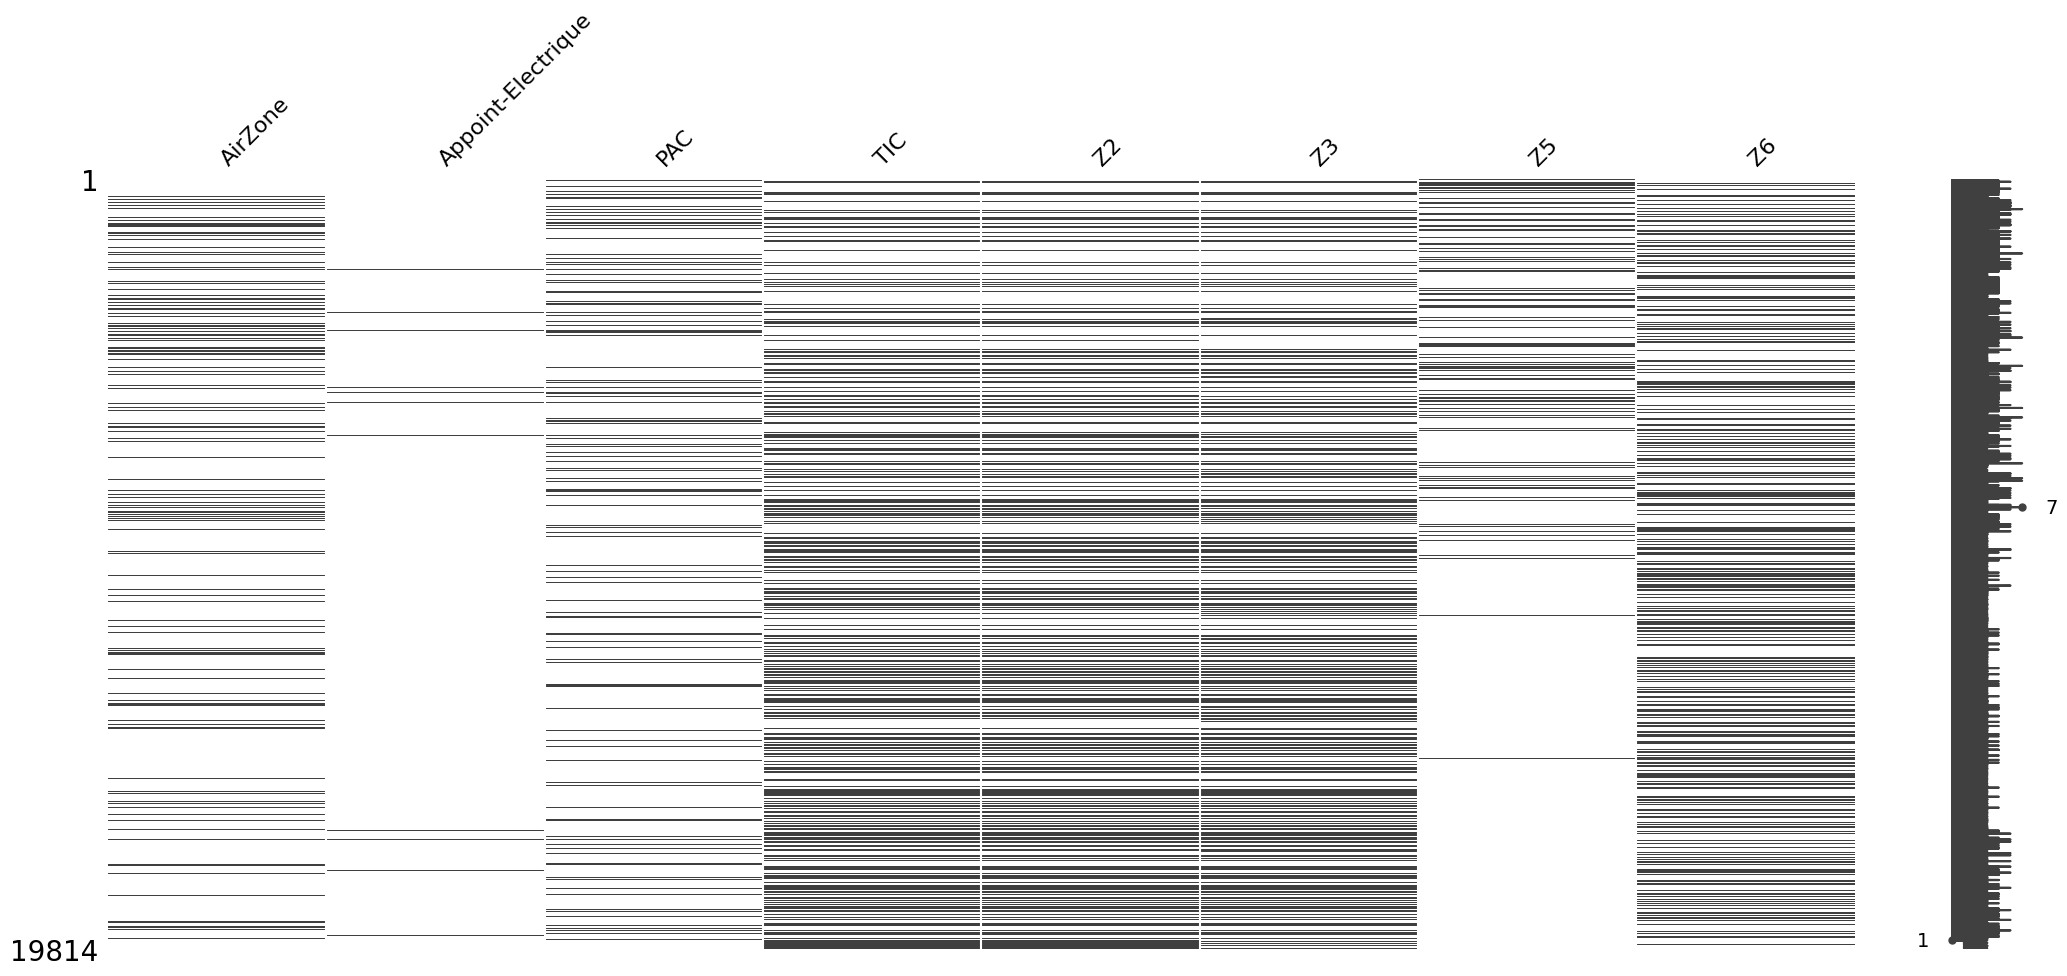

In [1009]:
msno.matrix(pivot_table)

In [1010]:
print(pivot_table.isna().sum())

Réplicat
AirZone               16318
Appoint-Electrique    19585
PAC                   16998
TIC                   11478
Z2                    11434
Z3                    11542
Z5                    17648
Z6                    12950
dtype: int64


In [ ]:
Soit le chauffage d appoint est allumé, soit il est éteint.

In [1011]:
# Remplacer les NaN par 0 dans la colonne 'Appoint-Electrique'
pivot_table['Appoint-Electrique'] = pivot_table['Appoint-Electrique'].fillna(0)


Les NAN des temperatures sont remplis avec la methode lineaire

In [1012]:
# Interpoler la colonne 'Z3' pour remplir les NaN par des valeurs linéaires
pivot_table['Z3'] = pivot_table['Z3'].interpolate(method='linear')
pivot_table['Z2'] = pivot_table['Z2'].interpolate(method='linear')
pivot_table['Z6'] = pivot_table['Z6'].interpolate(method='linear')

In [1014]:
# Réinitialiser l'index pour obtenir un DataFrame plat
pivot_table = pivot_table.reset_index()

In [1025]:
display(pivot_table)

,date,time,AirZone,Appoint-Electrique,PAC,TIC,Z2,Z3,Z5,Z6,Mois,Semaine,Jour/Nuit,Ete/Hiver,Tic_diff
0,2024-01-01,00:00:00,NaN,0.0,NaN,0.871667,17.500000,17.000000,NaN,17.1000,1,1,Nuit,Hiver,NaN
1,2024-01-01,00:05:00,NaN,0.0,0.61,NaN,17.496944,17.018519,NaN,17.0875,1,1,Nuit,Hiver,NaN
2,2024-01-01,00:20:00,0.25,0.0,NaN,NaN,17.493889,17.037037,NaN,17.0750,1,1,Nuit,Hiver,NaN
3,2024-01-01,01:00:00,NaN,0.0,1.28,2.032500,17.490833,17.055556,NaN,17.0625,1,1,Nuit,Hiver,NaN
4,2024-01-01,01:25:00,0.45,0.0,NaN,NaN,17.492917,17.077778,NaN,17.0500,1,1,Nuit,Hiver,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19811,2024-11-24,20:55:00,NaN,0.0,NaN,5.804200,15.960000,16.500000,NaN,17.5000,11,47,Nuit,Hiver,0.0212
19812,2024-11-24,21:00:00,NaN,0.0,NaN,5.906000,16.000000,16.500000,NaN,17.5000,11,47,Nuit,Hiver,0.1018
19813,2024-11-24,21:05:00,NaN,0.0,NaN,6.025200,16.000000,16.500000,NaN,17.5000,11,47,Nuit,Hiver,0.1192
19814,2024-11-24,21:10:00,NaN,0.0,NaN,6.143200,16.000000,16.500000,NaN,17.5000,11,47,Nuit,Hiver,0.1180


Il y a plusieurs types de compteurs :
1. TIC1 : La téléinformation remonte les données de conso venant du linky
2. PAC / Airzone / Appoint électrique : il s’agit de pinces ampermétriques qui mesure du
sous comptage dans le tableau électrique
3. Compteur calorie PAC : il s’agit de compteurs de calorie qui remontent les calories
diffusés dans le batiment

Noter que les données sont en valeurs CUMULEES !


In [1029]:
# Interpolation linéaire pour remplir les NaN
pivot_table['Tic_interpolated'] = pivot_table['TIC'].interpolate()


In [1031]:
# Calculer la différence entre les lignes successives
pivot_table['Tic_diff'] = pivot_table['Tic_interpolated'].diff()

In [1032]:
print(pivot_table.isna().sum())

date                      0
time                      0
AirZone               16320
Appoint-Electrique        0
PAC                   16999
TIC                   11478
Z2                        0
Z3                        0
Z5                    17650
Z6                        0
Mois                      0
Semaine                   0
Jour/Nuit                 0
Ete/Hiver                 0
Tic_diff                  1
Tic_interpolated          0
dtype: int64


In [1020]:
# Ajouter les colonnes restantes qui ne sont pas utilisées dans le pivot table
remaining_columns = [ 'date', 'time', 'Mois', 'Semaine', 'Jour/Nuit', 'Ete/Hiver']
additional_data = Marc_Conso_Day[remaining_columns].drop_duplicates()


In [1021]:
# Convertir la colonne 'date' des deux DataFrames en datetime
pivot_table['date'] = pd.to_datetime(pivot_table['date'])
additional_data['date'] = pd.to_datetime(additional_data['date'])

# Fusionner les DataFrames
pivot_table = pd.merge(pivot_table, additional_data, on=['date', 'time'], how='left')


In [1033]:
display(pivot_table)

,date,time,AirZone,Appoint-Electrique,PAC,TIC,Z2,Z3,Z5,Z6,Mois,Semaine,Jour/Nuit,Ete/Hiver,Tic_diff,Tic_interpolated
0,2024-01-01,00:00:00,NaN,0.0,NaN,0.871667,17.500000,17.000000,NaN,17.1000,1,1,Nuit,Hiver,NaN,0.871667
1,2024-01-01,00:05:00,NaN,0.0,0.61,NaN,17.496944,17.018519,NaN,17.0875,1,1,Nuit,Hiver,0.386944,1.258611
2,2024-01-01,00:20:00,0.25,0.0,NaN,NaN,17.493889,17.037037,NaN,17.0750,1,1,Nuit,Hiver,0.386944,1.645556
3,2024-01-01,01:00:00,NaN,0.0,1.28,2.032500,17.490833,17.055556,NaN,17.0625,1,1,Nuit,Hiver,0.386944,2.032500
4,2024-01-01,01:25:00,0.45,0.0,NaN,NaN,17.492917,17.077778,NaN,17.0500,1,1,Nuit,Hiver,0.481250,2.513750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19811,2024-11-24,20:55:00,NaN,0.0,NaN,5.804200,15.960000,16.500000,NaN,17.5000,11,47,Nuit,Hiver,0.021200,5.804200
19812,2024-11-24,21:00:00,NaN,0.0,NaN,5.906000,16.000000,16.500000,NaN,17.5000,11,47,Nuit,Hiver,0.101800,5.906000
19813,2024-11-24,21:05:00,NaN,0.0,NaN,6.025200,16.000000,16.500000,NaN,17.5000,11,47,Nuit,Hiver,0.119200,6.025200
19814,2024-11-24,21:10:00,NaN,0.0,NaN,6.143200,16.000000,16.500000,NaN,17.5000,11,47,Nuit,Hiver,0.118000,6.143200


In [1017]:
from datetime import datetime, timedelta

# Assurez-vous que les colonnes 'Date' et 'time' sont au bon format
pivot_table['date'] = pd.to_datetime(pivot_table['date']).dt.date
pivot_table['time'] = pd.to_datetime(pivot_table['time'], format='%H:%M:%S').dt.time

In [1018]:

# Fonction pour remplir les NaN dans la colonne 'Temp_C'
def fill_nan_with_mean_temp(df):
    # Trier le DataFrame par 'Réplicat', 'date' et 'time'
    df = df.sort_values(by=['Réplicat', 'date', 'time']).reset_index(drop=True)

    # Convertir 'date' et 'time' en datetime pour faciliter le calcul des différences de temps
    df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str))

    # Calculer la différence de temps entre les lignes successives
    df['Time_Diff'] = df['datetime'].diff().dt.total_seconds()

    for i in range(1, len(df) - 1):
        if pd.isna(df.loc[i, 'Temp_C']):  # Vérifier si la valeur est NaN
            # Vérifier que les modalités de 'Réplicat' sont identiques pour les lignes avant et après
            if (df.loc[i - 1, 'Réplicat'] == df.loc[i, 'Réplicat'] == df.loc[i + 1, 'Réplicat']):
                # Vérifier que la différence de temps est inférieure à 20 minutes (1200 secondes)
                if df.loc[i - 1, 'Time_Diff'] < 1200 and df.loc[i + 1, 'Time_Diff'] < 1200:
                    # Calculer la moyenne des valeurs avant et après
                    mean_temp = (df.loc[i - 1, 'Temp_C'] + df.loc[i + 1, 'Temp_C']) / 2
                    df.loc[i, 'Temp_C'] = mean_temp

    # Supprimer la colonne temporaire 'datetime' et 'Time_Diff' si nécessaire
    df = df.drop(columns=['datetime', 'Time_Diff'])

    return df
